Load all the data from an exported datafolder.  The program expects the data to be exported from aftermath with minimal changes to the default export options

Once the data has been exported to csv files, the data loader will import all the datasets from the base folder

In [1]:
import os 
import matplotlib.pyplot as plt
from PineTools import LoadAllDatasets,PlotMode, PlotCV, DetermineElectrical, analyze_voltammogram_with_combined_plots
dataFolder=r'\\biod0237\NetworkData\omcS\OMCS_Gating3_0506\Archive [2025-MAY-06 1435 #1]'

voltammagrams=LoadAllDatasets(dataFolder)

#get the key for the voltammagram
example_key=list(voltammagrams.keys())[0]

Each item in the dictionary contains a dataset indexed by the name given in the Aftermath tree.  A number of parameters are written to the data to enable quick and accurate analysis

In [2]:
example=voltammagrams[example_key]

print(f'Example information from the voltammagram: {example_key}')
print(f'Scan Range: {example['minPotential_V']:.2f} to {example['maxPotential_V']:.2f} V')
print(f'Number of Cycles: {example['cycles']}')
print(f'Scan Rate: {example['speed_Vs']:.2f} V/s')
parts = example['parts']
print(f'Electrodes Recorded: { len(parts.keys())}')
for part in parts.keys():
    print(f'\t{part}')
    
if len(parts.keys()) > 1:
    print(f'Electrode Offset: {example['offset_V']:.2f} V')

Example information from the voltammagram: D1_DeCV2
Scan Range: -0.99 to 0.44 V
Number of Cycles: 1
Scan Rate: 40.60 V/s
Electrodes Recorded: 2
	E1
	E2
Electrode Offset: 0.14 V


There are four built in plots, and it does not take much to make many more plots as the data is held in a pandas dataframe


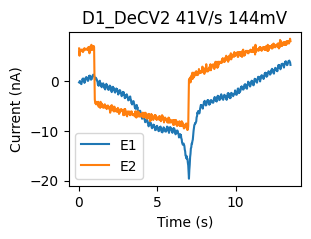

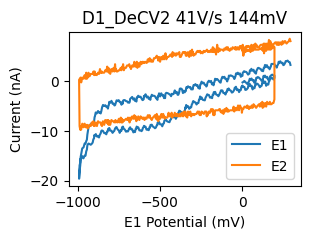

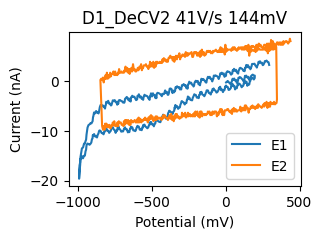

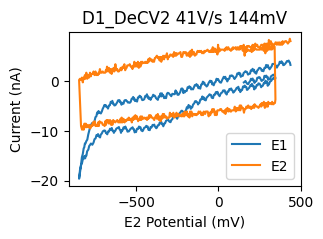

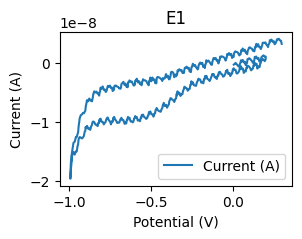

In [3]:
PlotCV(voltammagrams, example_key, showTitle=True, showAverage=False, mode=PlotMode.ByTime,  figsize=(3,2) )
PlotCV(voltammagrams, example_key, showTitle=True, showAverage=False, mode=PlotMode.ByE1Potential,  figsize=(3,2)) 
if len(parts.keys()) > 1:
    PlotCV(voltammagrams, example_key, showTitle=True, showAverage=False, mode=PlotMode.ByEachPotential,  figsize=(3,2)) 
    PlotCV(voltammagrams, example_key, showTitle=True, showAverage=False, mode=PlotMode.ByE2Potential,  figsize=(3,2)) 
    
#this is a pandas dataframe with columns     Time (s)  Potential (V)   Current (A)
#you can manually plot the data using this dataframe 
parts['E1']  ['data'].plot(x='Potential (V)', y='Current (A)', title='E1', xlabel='Potential (V)', ylabel='Current (A)',  figsize=(3,2))
plt.show()

We can iterate through the dataset to get an example of the data in each item.  From this we can determine which datasets are interesting.  The keys are printed out above each graph for ease of use.

D1_DeCV2


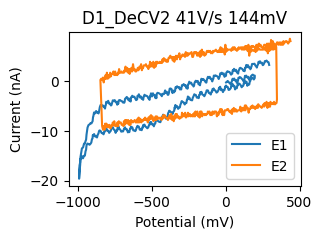

DECV Experiment [2025-MAY-06 1551 #46]


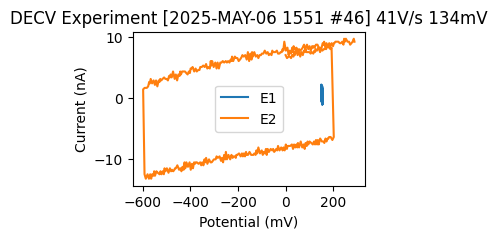

E12_Decv_400mvs_250mV


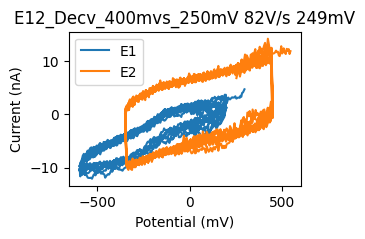

E1_2Elec


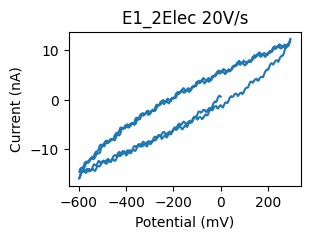

In [ ]:
cc=0
for key in voltammagrams.keys():    
    print(key)
    PlotCV(voltammagrams, key, showTitle=True, showAverage=False, mode=PlotMode.ByEachPotential, figsize=(3,2)) 
    cc+=1
    #if cc > 3:
    #    break

Basic electrical properties of the junction help diagnose problems, especially for the biopotentiostat.  We can get information about the faradaic leakage, tunneling leakage and the device capacitance by comparing the forward and backward currents.  This routine will attempt to fit a line to the rising and falling currents and returns the approximate leakage current and capacitance of the junction.  

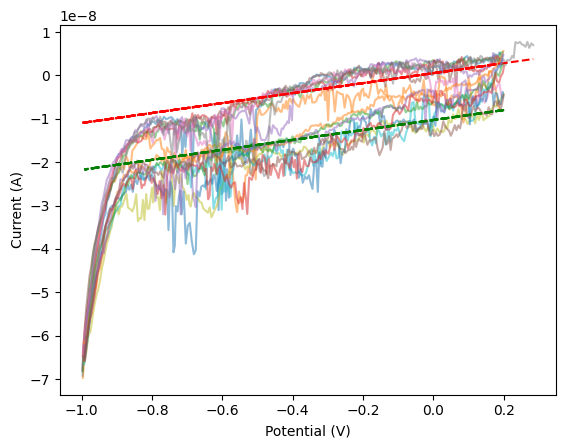

leakage: 1.15e-08 S, capacitance: 1.06e-10 F, capacitance_gap: 8.24e-11 F


In [5]:
key ='W14_Decv_500mVs_2'
leakage, capacitance,capacitance_gap, raw_elect = DetermineElectrical(voltammagrams,key, electrode='E1', plot=True)
 
print( f'leakage: {leakage:.2e} S, capacitance: {capacitance:.2e} F, capacitance_gap: {capacitance_gap:.2e} F')

Last, we need information about the peaks and charge passed.  This routine will attempt to fit a guassian to the EC data.  This is a complicated nonlinear fit, so the intial conditions matter.  The routine requires the rough location of the peaks (the number does not have to exact) and can handle multple overlapping peaks.  

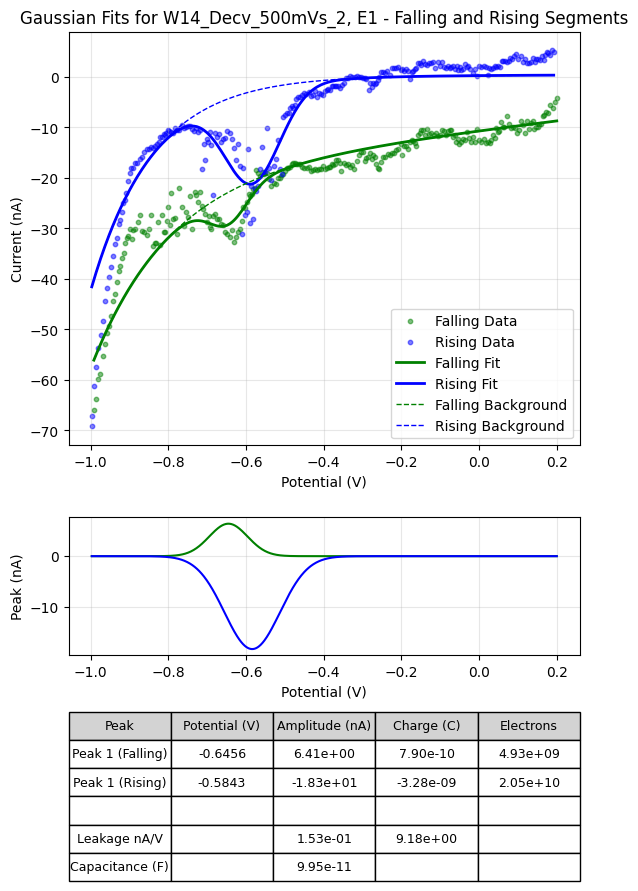

In [7]:
 
peak_locations_falling = [-0.65]
peak_locations_rising = [-0.65]
key='W14_Decv_500mVs_2'
leakage, capacitance,capacitance_gap, raw_elect = DetermineElectrical(voltammagrams,key, electrode='E1', plot=False)
params_falling, params_rising, peak_info_falling, peak_info_rising = analyze_voltammogram_with_combined_plots(
    voltammagrams, key,raw_elect,peak_locations_falling,peak_locations_rising, electrode='E1', figsize=(6,9))